In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
bench = pd.read_csv('results/Columbia/baseline.csv', index_col=0)
MIMO_full = pd.read_csv('results/Columbia/10runs/fulldata_LSTM10.csv', index_col=0)
MIMO = pd.read_csv('results/Columbia/10runs/LSTM_MIMO10.csv', index_col=0)
condRNN = pd.read_csv('results/Columbia/10runs/ConditionalRNN10_sequential.csv', index_col=0)
datasets = [MIMO, condRNN, MIMO_full]

In [16]:
condRNN_global = pd.read_csv('results/Columbia/global/', index_col=0)

In [87]:
means = []
stds = []
datasets2 = [MIMO, condRNN, MIMO_full, bench]
#means.append(35.58681558224254)
#stds.append(0)
for df in datasets2:
    #means.append(df['mape'].mean())
    #stds.append(df['mape'].std())
    means.append(df['rmse'].mean())
    stds.append(df['rmse'].mean())

In [88]:
means

[0.7219496345231189,
 0.6951992085880323,
 0.7163537522559956,
 0.7420941931322251]

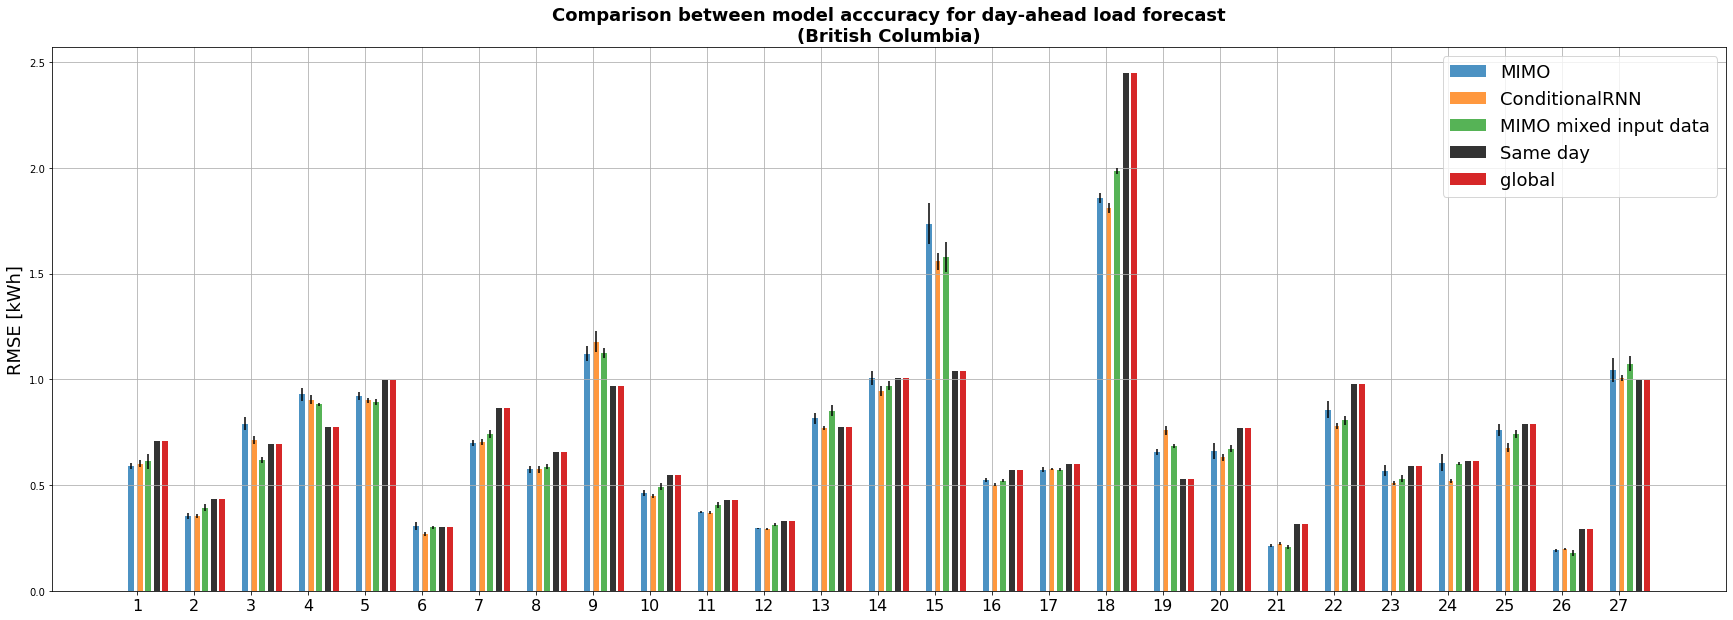

In [39]:
fig, ax = plt.subplots()
colors=["green", "green", "green", "black"]
labels = ['MIMO', 'ConditionalRNN', 'MIMO mixed input data', 'Same day']
x = np.array(range(1,55,2))
for i,df in enumerate(datasets):
    means = df.groupby('B')['rmse'].mean()
    stds = df.groupby('B')['rmse'].std()
    ax.bar(x, means, yerr=stds, alpha=0.8, width=0.2, label=labels[i])
    x = x+0.3
i = 3
ax.bar(x, bench['rmse'], alpha=0.8, width=0.2, label=labels[i], color=colors[i])
ax.bar(x+0.3, condRNN_global['rmse'].drop(27), width=0.2, label='global')
plt.xticks(ticks=np.array(range(1,55,2))+0.2, labels=np.array(range(1,28)), fontsize=16)
plt.title('Comparison between model acccuracy for day-ahead load forecast\n(British Columbia)', fontsize=18, fontweight='bold')
plt.ylabel('RMSE [kWh]', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.rcParams['figure.figsize'] = (30, 10)
plt.show()

In [21]:
x.shape

(27,)

In [26]:
condRNN_global['rmse'].drop(27)

0     0.707015
1     0.432507
2     0.694845
3     0.776717
4     0.999393
5     0.302340
6     0.866386
7     0.658220
8     0.969295
9     0.546686
10    0.428736
11    0.331452
12    0.773038
13    1.007816
14    1.041901
15    0.573560
16    0.598907
17    2.448748
18    0.529372
19    0.768395
20    0.318059
21    0.980014
22    0.588660
23    0.613254
24    0.790510
25    0.294462
26    0.996254
Name: rmse, dtype: float64

In [24]:
bench['rmse']

1     0.707015
2     0.432507
3     0.694845
4     0.776717
5     0.999393
6     0.302340
7     0.866386
8     0.658220
9     0.969295
10    0.546686
11    0.428736
12    0.331452
13    0.773038
14    1.007816
15    1.041901
16    0.573560
17    0.598907
18    2.448748
19    0.529372
20    0.768395
21    0.318059
22    0.980014
23    0.588660
24    0.613254
25    0.790510
26    0.294462
27    0.996254
Name: rmse, dtype: float64

No handles with labels found to put in legend.


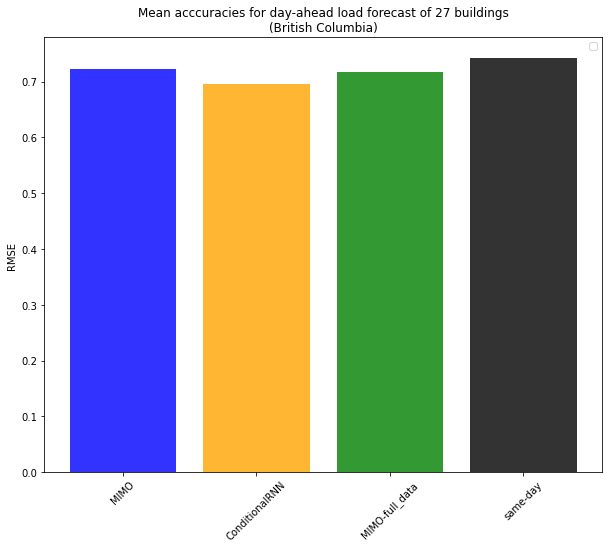

In [91]:
plt.rcParams['figure.figsize'] = (10, 8)
colors=["blue", "orange", "green", "black"]
labels = ['MIMO', 'ConditionalRNN', 'MIMO-full_data', 'same-day']
#plt.grid(zorder=0)
plt.bar(range(len(means)), means, align='center', color=colors, alpha=0.8, zorder=1)
plt.xticks(ticks=range(len(means)), labels=labels,
           rotation=45)
plt.title('Mean acccuracies for day-ahead load forecast of 27 buildings\n(British Columbia)')
plt.ylabel('RMSE')
plt.legend()
plt.show()